# Inspect final data

Total run time: approx. 10 min

### 1. Helper methods

We will be using GTSRB dataset (German Traffic Sign Recognition Benchmark) from http://benchmark.ini.rub.de/?section=gtsrb&subsection=news.
Available datasets are train and test. We will further split train set to train and validation.

#### Notebook setup

In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [3]:
import torch
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms, utils
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import os
import pandas as pd
import PIL
from PIL import Image
from tqdm.notebook import trange, tqdm
from time import sleep

In [4]:
import datetime
currentDT = datetime.datetime.now()
print (str(currentDT))

2020-05-02 10:37:35.691228


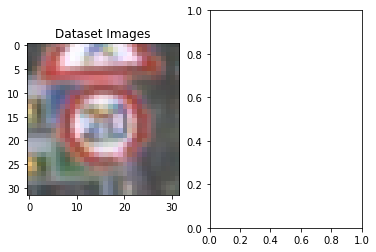

In [14]:
def convert_image_np(inp):
    """Convert a Tensor to numpy image."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

def visualize_batch():
    with torch.no_grad():
        # Get a batch of training data
        data = next(iter(dataset))[0].to(device)

        input_tensor = data.cpu()
        in_grid = convert_image_np(
            utils.make_grid(input_tensor))

        # Plot the results side-by-side
        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(in_grid)
        axarr[0].set_title('Dataset Images')

visualize_batch()  

180


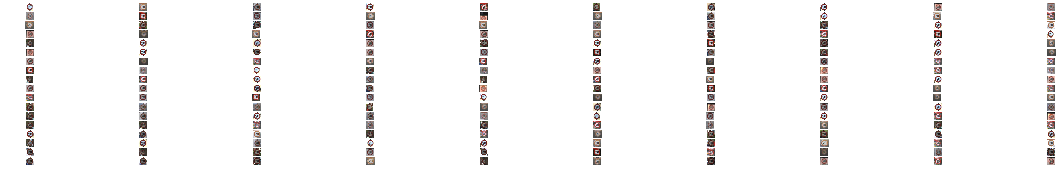

In [14]:
fig = plt.figure(figsize=(20, 20))
#ax = plt.axes([0,0,1,1], frameon=False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)


mpl.rcParams['savefig.pad_inches'] = 0

images_root = './source_data_2/train/'
class_id = str(0).zfill(2)
class_list = list(os.scandir(images_root+class_id))
print(len(class_list))
i=0

for entry in iter(class_list):
    plt.subplot(120,10,i+1)
    plt.axis('off')
    plt.autoscale(tight=True)
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    img=mpimg.imread(images_root+class_id+'/'+entry.name)
    plt.imshow(img)
    i += 1
    
#def full_frame(width=None, height=None):
#    import matplotlib as mpl
#    mpl.rcParams['savefig.pad_inches'] = 0
#    figsize = None if width is None else (width, height)
#    fig = plt.figure(figsize=figsize)
#    ax = plt.axes([0,0,1,1], frameon=False)
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
#    plt.autoscale(tight=True)
